# XG Boost optimised

In [13]:
import pandas as pd

# Define the list of file names
file_names = [
    "../train/02-14-2018_clean.csv",
    "../train/02-15-2018_clean.csv",
    "../train/02-16-2018_clean.csv",
    "../train/02-20-2018_clean.csv",
    "../train/02-21-2018_clean.csv",
    "../train/02-22-2018_clean.csv",
    "../train/02-23-2018_clean.csv",
    "../train/02-28-2018_clean.csv",
    "../train/03-01-2018_clean.csv",
    "../train/03-02-2018_clean.csv"
]

# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file names and read each file as a DataFrame
for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

# Print the shape of the combined DataFrame
print(df.shape)

(12639793, 71)


In [14]:
test = pd.read_csv("../test/test.csv", index_col=False)
print(test.shape)

(3159955, 72)


In [15]:
import pandas as pd

# Separate instances with label 5
sql_injection_instances = df[df['Label'] == 5]

# Separate instances with labels other than 5
other_instances = df[df['Label'] != 5]

# Sample a fraction from other_instances
sampled_other_instances = other_instances.sample(frac=0.01, random_state=42)

# Combine instances from label 5 and the sampled instances
df = pd.concat([sql_injection_instances, sampled_other_instances], ignore_index=True)

In [16]:
import pandas as pd

# Separate instances with label 5
sql_injection_instances_test = test[test['Label'] == 5]

# Separate instances with labels other than 5
other_instances_test = test[test['Label'] != 5]

# Sample a fraction from other_instances_test
sampled_other_instances_test = other_instances_test.sample(frac=0.01, random_state=42)

# Combine instances from label 5 and the sampled instances
test = pd.concat([sql_injection_instances_test, sampled_other_instances_test], ignore_index=True)

In [17]:
features = [
    "PSH Flag Cnt",
    "Dst Port",
    "Init Fwd Win Byts",
    "RST Flag Cnt",
    "Fwd PSH Flags",
    "Bwd IAT Max",
    "Date",
    "Fwd IAT Tot",
    "Fwd IAT Max",
    "Fwd IAT Min",
    "Fwd Seg Size Min",
    "Bwd Seg Size Avg",
    "Flow Duration",
    "Init Bwd Win Byts",
    "Fwd IAT Mean",
    "Pkt Len Std",
    "Bwd Pkts/s",
    "Time",
    "Bwd Pkt Len Mean",
    "Fwd Pkt Len Max",
    "Fwd Pkts/s",
    "Bwd Header Len",
    "Bwd IAT Tot",
    "Pkt Len Max",
    "Bwd Pkt Len Min",
    "Bwd Pkt Len Max",
    "Subflow Fwd Byts",
    "Flow IAT Max",
    "ACK Flag Cnt",
    "Flow IAT Mean",
    "TotLen Fwd Pkts",
    "Fwd Header Len",
    "Protocol",
    "ECE Flag Cnt",
    "Pkt Len Var",
    "SYN Flag Cnt"
]
len(features)

36

In [18]:
cols_to_drop = [col for col in df.columns if col not in features and col != 'Label']
df.drop(cols_to_drop, axis=1, inplace=True)
test.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
X_train = df.drop('Label', axis=1)
y_train = df['Label']
X_test = test.drop('Label', axis=1)
y_test = test['Label']

In [20]:
X_test = X_test.drop(columns="Unnamed: 0")

In [21]:
from xgboost import XGBClassifier
import numpy as np

# Adjust class weights to prioritize recall
class_weights = len(y_train) / (6 * np.bincount(y_train))
best_model = XGBClassifier(n_jobs=8, scale_pos_weight=class_weights)

best_model.fit(X_train, y_train)

[04:45:58] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

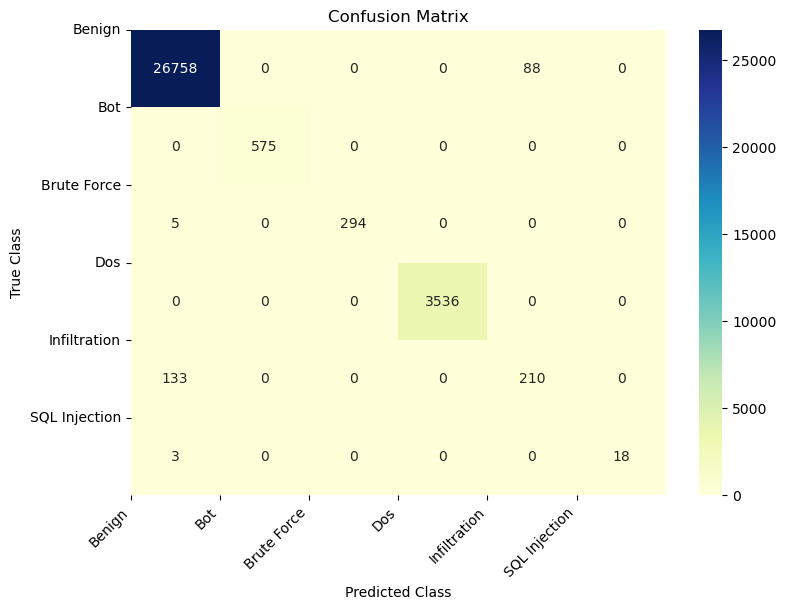

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the best_model
y_pred = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

label_names = ['Benign', 'Bot', 'Brute Force', 'Dos', 'Infiltration', 'SQL Injection']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")

# Set custom tick labels
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=45, ha='right')
plt.yticks(ticks=range(len(label_names)), labels=label_names, rotation=0)

plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


In [24]:
from xgboost import XGBClassifier

# Calculate class weights
class_weights = len(y_train) / (6 * np.bincount(y_train))

# Create the XGBClassifier with class weights
model1 = XGBClassifier(n_jobs=8)

# Fit the model with class weights
model1.fit(X_train, y_train, sample_weight=class_weights[y_train])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

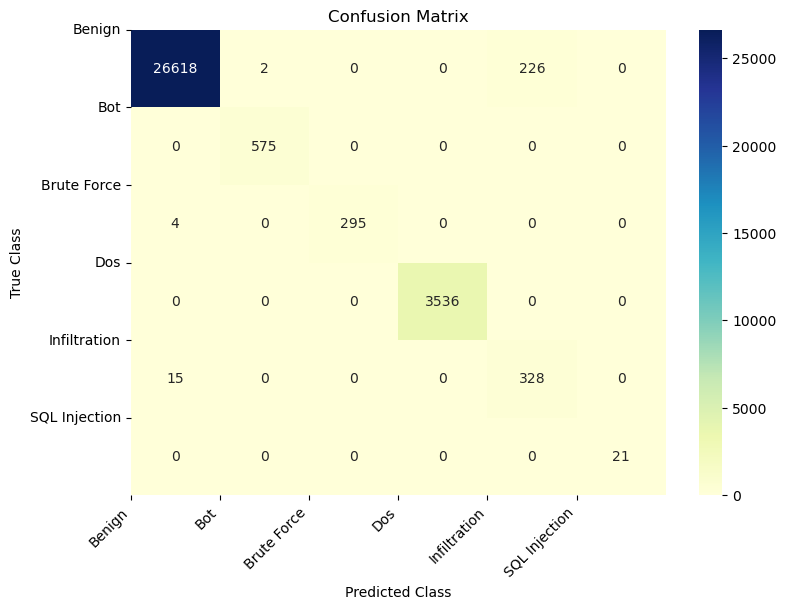

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the best_model
y_pred = model1.predict(X_test)

# Compute confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

label_names = ['Benign', 'Bot', 'Brute Force', 'Dos', 'Infiltration', 'SQL Injection']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap="YlGnBu", fmt="d")

# Set custom tick labels
plt.xticks(ticks=range(len(label_names)), labels=label_names, rotation=45, ha='right')
plt.yticks(ticks=range(len(label_names)), labels=label_names, rotation=0)

plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()
